导入包的依赖

In [11]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import random

读取实验训练集和验证集

In [12]:
# 在下载时指定n_features为123
X,y = sd.load_svmlight_file('a9a.txt',n_features = 123)
# 将数据集切分为训练集和验证集
X_train, X_valid, y_train, y_valid = sms.train_test_split(X,y) 
#对稀疏矩阵进行类型转换
X_train = X_train.toarray()
X_valid = X_valid.toarray()
y_train = y_train.reshape(len(y_train),1)
y_valid = y_valid.reshape(len(y_valid),1)

X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis = 1)
X_valid = np.concatenate((np.ones((X_valid.shape[0],1)),X_valid),axis = 1)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((24420, 124), (8141, 124), (24420, 1), (8141, 1))

定义hinge loss函数

In [13]:
def hinge_loss(X, y, theta, C):
    loss = np.maximum(0, 1 - np.multiply(y, X.dot(theta))).mean()
    reg = np.multiply(theta,theta).sum() / 2
    return C * loss + reg

计算当前的loss

In [14]:
theta = np.random.random((X_train.shape[1],1))
C = 0.4
hinge_loss(X_train, y_train, theta, C)

23.71548771837736

定义hinge gradient函数

In [15]:
def hinge_gradient(X, y, theta, C):
    error = np.maximum(0, 1 - np.multiply(y, X.dot(theta)))
    index = np.where(error==0)
    x = X.copy()
    x[index,:] = 0
    grad = theta - C * x.T.dot(y) / len(y)
    grad[-1] = grad[-1] - theta[-1]
    return grad

定义SVM decent函数

In [16]:
def svm_descent(X, y, theta, alpha, num_iters, batch_size, X_valid, y_valid, C):
    loss_train = np.zeros((num_iters,1))
    loss_valid = np.zeros((num_iters,1))
    data = np.concatenate((y, X), axis=1)
    for i in range(num_iters):
        sample = np.matrix(random.sample(data.tolist(), batch_size))
        grad = hinge_gradient(sample[:,1:125], sample[:,0], theta, C)
        theta = theta - alpha * grad
        loss_train[i] = hinge_loss(X, y, theta, C)
        loss_valid[i] = hinge_loss(X_valid, y_valid, theta, C)
    return theta, loss_train, loss_valid

定义SVM score函数

In [20]:
def svm_score(X, y, theta):
    hx = X.dot(theta)
    hx[hx>=5] = 1
    hx[hx<5] = -1
    hx = (hx==y)
    return np.mean(hx)

In [30]:
theta = np.random.random((X_train.shape[1],1))
alpha = 0.01
num_iters = 6
opt_theta, loss_train, loss_valid = svm_descent(X_train, y_train, theta, alpha, num_iters, 64, X_valid, y_valid, C)
loss_train.max(), loss_train.min(), loss_valid.max(), loss_valid.min()

(22.216066221538107, 20.13863475904845, 22.220882632414014, 20.143271270843858)

In [31]:
svm_score(X_valid, y_valid, opt_theta)

0.7593661712320354

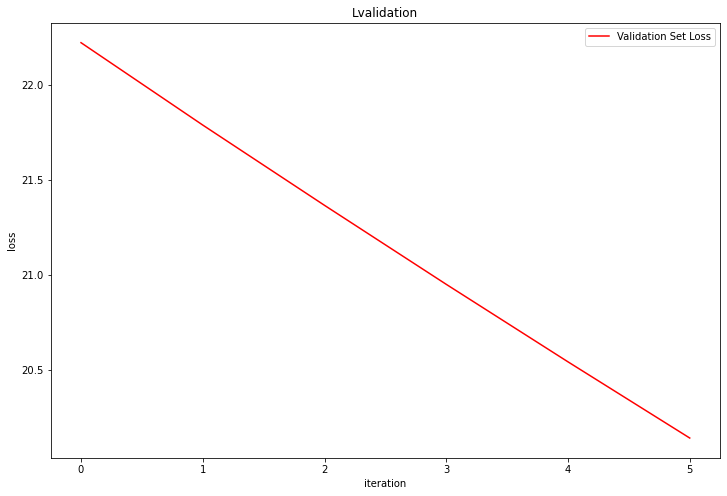

In [32]:
iteration = np.arange(0, num_iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Lvalidation')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
# plt.plot(iteration, loss_train, 'b', label='Training Set Loss')
plt.plot(iteration, loss_valid, 'r', label='Validation Set Loss')
plt.legend()
plt.show()